In [1]:
import numpy as np
import json
import pandas as pd
from datetime import datetime, timedelta
import pandas as pd
pd.set_option('display.max_columns', 500)  # or 1000
pd.set_option('display.max_rows', 500)  # or 1000

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.transforms import ScaledTranslation
from matplotlib.transforms import Affine2D

In [3]:
# matplotlib settings

colwidth = 5.50107/2 # inches
textwidth = 5.50107 # inches
fontsize = 10 # pt
linewidth = 1
markersize = 5
figsize_half = (colwidth, colwidth) # inches
figsize = (textwidth, colwidth) # inches

#matplotlib.rc("text", usetex=True) # need to install texlive and latex
#matplotlib.rc("text.latex", preamble=r"\usepackage{newpxtext}\usepackage{newpxmath}\usepackage{commath}\usepackage{mathtools}")

matplotlib.rc("font", family="serif", size=fontsize) # points
matplotlib.rc("axes", titlesize=fontsize) # points
matplotlib.rc("savefig", dpi=200)
matplotlib.rc("legend", loc="best", fontsize=fontsize, fancybox=True, framealpha=0.5) # or fontsize=13 (points)
matplotlib.rc("lines", linewidth=0.8, markersize=3.5, markeredgewidth=1)
# matplotlib.rc('text.latex', preamble=r'\usepackage{cmbright}\usepackage{amsmath}\usepackage{amssymb}')
# plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rc("figure", autolayout=True) # tight_layout
matplotlib.rcParams['savefig.bbox'] = "tight"
matplotlib.rcParams['savefig.pad_inches'] = 0.02 # 0.1 default
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

matplotlib.rc("lines", markerfacecolor='none')
matplotlib.rc("lines", linewidth=linewidth)
matplotlib.rc("lines", markersize=markersize)
# matplotlib.rc("errorbar", capsize=2)

In [2]:
path_to_pics = './pics'

## Task A

In [5]:
runs = []
with open(f"logs/mylog.txt", 'r') as fin:
    for line in fin:
        line = line.strip()
        if not line:
            continue
        try:
            run = json.loads(line)
            runs.append(run)
        except json.JSONDecodeError:
            raise ValueError(f"Error parsing JSON: {line}")

df = pd.DataFrame(runs)
df = df[df['ver'] == "taskA-v2"]
df.sort_values(['dataset', 'method'])

,ver,rep,seed,method,dataset,value,runtime,timestamp
0,taskA-v2,1,1761817642,mean,email_train.csv,0.479473,0.000028,2025-10-30 17:47:22
2,taskA-v2,2,1761817642,mean,email_train.csv,0.479473,0.000030,2025-10-30 17:47:22
4,taskA-v2,3,1761817642,mean,email_train.csv,0.479473,0.000029,2025-10-30 17:47:22
1,taskA-v2,1,1761817642,sum,email_train.csv,47.947326,0.000025,2025-10-30 17:47:22
3,taskA-v2,2,1761817642,sum,email_train.csv,47.947326,0.000018,2025-10-30 17:47:22
5,taskA-v2,3,1761817642,sum,email_train.csv,47.947326,0.000013,2025-10-30 17:47:22


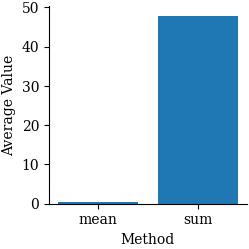

In [8]:
plt.figure(figsize=figsize_half)

m2v = dict()

for method in df['method'].unique():
    # average value
    df_method = df[df['method'] == method]
    value = df_method['value'].mean()
    m2v[method] = value

plt.bar(m2v.keys(), m2v.values())
plt.xlabel("Method")
plt.ylabel("Average Value")

# Save the figure
fname = f'{path_to_pics}/taskA-method-vs-value.pdf'
plt.savefig(fname)
